In [27]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [ ]:
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


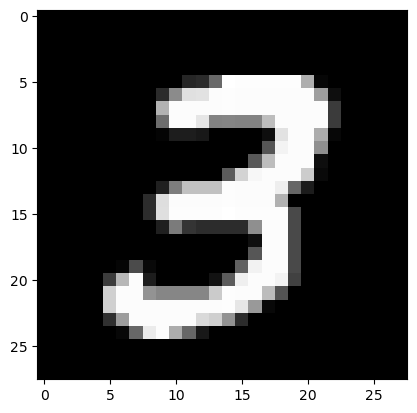

In [ ]:
plt.imshow(x_treinamento[7], cmap = 'gray')

Text(0.5, 1.0, 'Classe 1')

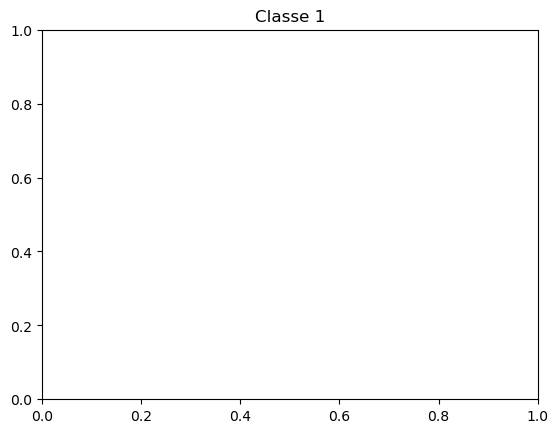

In [ ]:
plt.title('Classe ' + str(y_treinamento[7]))

In [ ]:
previsores_treinamento = x_treinamento.reshape(x_treinamento.shape[0],
                                                28, 28, 1)

In [ ]:
previsores_teste = x_teste.reshape(x_teste.shape[0], 28, 28, 1)

In [ ]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [ ]:
previsores_treinamento /= 255
previsores_teste /= 255

In [ ]:
classe_treinamento = to_categorical(y_treinamento, 10)

In [ ]:
classe_teste = to_categorical(y_teste, 10)

In [ ]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (28, 28, 1),
                          activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Conv2D(32, (3,3)), activation = 'relu')
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2189 - accuracy: 0.9387 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0692 - accuracy: 0.9801 - val_loss: 0.0552 - val_accuracy: 0.9829
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0464 - accuracy: 0.9863 - val_loss: 0.0537 - val_accuracy: 0.9819
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0340 - accuracy: 0.9901 - val_loss: 0.0404 - val_accuracy: 0.9867
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0415 - val_accuracy: 0.9860


In [ ]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 1s 3ms/step - loss: 0.0415 - accuracy: 0.9860
